# Model comparison -- Overall GLAM models
# individual fit models

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("data1 = "+ str(mean(data1))+ "; data2 = "+ str(mean(data2))+"; [data1 - data2] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1,hatch='//')
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    count = 0
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        if data1[i] < data2[i]:
            print ("Participants with InvFull > Full: " + str(i) + '. Difference : ' + str(data1[i] - data2[i]))
            count+=1
    print ("Total number of participants with lower WAIC for " + lab1+ ' : ' + str(count))
        
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
    plt.ylabel(title, fontsize=18)
    sns.despine()

-------------------------

# 1. Model comparison - WAIC scores


In [3]:
waic_exp2_2ndChoice_gaze_free = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Free.npy'))
waic_exp2_2ndChoice_gaze_fix = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Fixed.npy'))

waic_exp2_2ndChoice_free = np.load(str('Results/Waic/glam_CP2020_indiv_noBias_exp2_2ndChoice_Free.npy'))
waic_exp2_2ndChoice_fix = np.load(str('Results/Waic/glam_CP2020_indiv_noBias_exp2_2ndChoice_Fixed.npy'))

In [4]:
# waic_exp2_2ndChoice_gaze_free = np.delete(waic_exp2_2ndChoice_gaze_free, [1,2,5,8])
# waic_exp2_2ndChoice_gaze_fix = np.delete(waic_exp2_2ndChoice_gaze_fix,[1,2,5,8])
# waic_exp2_2ndChoice_free = np.delete(waic_exp2_2ndChoice_free,[1,2,5,8])
# waic_exp2_2ndChoice_fix = np.delete(waic_exp2_2ndChoice_fix,[1,2,5,8])

In [5]:
waic_exp2_2ndChoice_gaze_free

array([-566.63018971, -476.96675606, -514.35134541, -535.60769678,
       -566.87535161, -498.91164905, -595.20941479, -506.63449784,
       -459.45594021, -546.83932609, -451.33093767, -555.23517026,
       -495.20025349, -516.50553547, -489.50704683, -505.50644914,
       -564.55914835, -597.12323775])

In [6]:
waic_exp2_2ndChoice_free

array([-568.66541433, -475.62454063, -512.01234507, -548.94149334,
       -566.14212282, -500.55461318, -601.18097169, -505.50779378,
       -457.902699  , -546.13724993, -453.32817373, -556.98720631,
       -494.27384756, -515.46820476, -488.69119589, -518.07212445,
       -563.53914379, -599.27149639])

In [7]:
Models_WAIC = [np.mean(waic_exp2_2ndChoice_gaze_free),
               np.mean(waic_exp2_2ndChoice_gaze_fix)]

Models_WAIC_part = [waic_exp2_2ndChoice_gaze_free,
               waic_exp2_2ndChoice_gaze_fix]


Models_WAIC

[-524.5805525835517, -530.0048289693781]

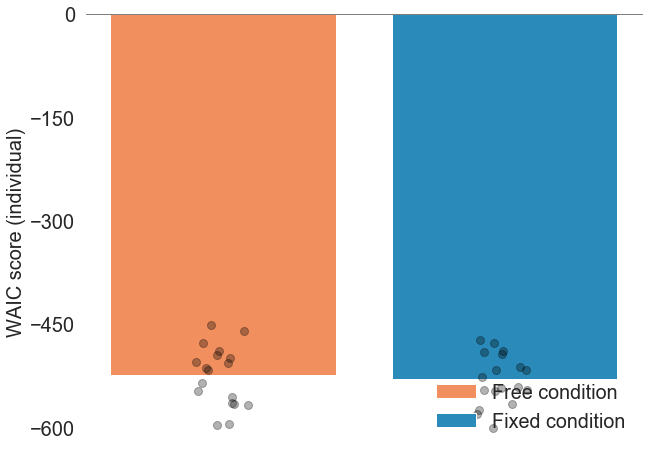

In [8]:
ysize = 20
ticksize = 20
nticks = 5

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')


x = np.arange(len(Models_WAIC))

bars = plt.bar(x, Models_WAIC, color=['#f18f5e','#2a8bba'])
patterns = ('', '')

#plt.xticks(x, ('', 'Frame-Value', 'Preference-Value'))
#plt.ylim(15000,18000)
plt.ylabel('WAIC score (individual)',fontsize = ysize )

st2_free_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'', label='Free condition')
st2_fixed_patch = mpatches.Patch(facecolor='#2a8bba',hatch=r'', label='Fixed condition')

leg = plt.legend(handles=[st2_free_patch,st2_fixed_patch],loc = "lower right" )
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

    
# Turn off tick labels
#plt.xticks([0,1,2,3,4,5,6,7],['Cho1','Cho2','Cho1','Cho2','Cho2','Cho1','Cho2','Cho2'])
plt.axhline(0, color='black', lw=2, alpha=0.5)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])

sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/CP2020_WAIC_ModelComparison_hier.png'), dpi = 200 )

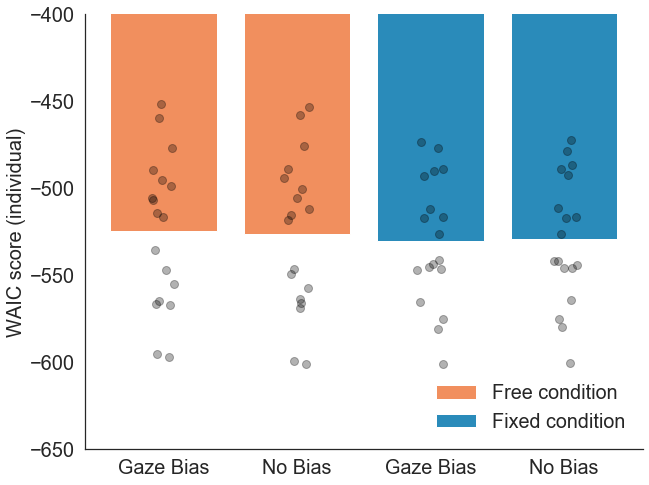

In [9]:
# Load all 4 models (with gaze and no gaze bias)
Models_WAIC = [np.mean(waic_exp2_2ndChoice_gaze_free),
               np.mean(waic_exp2_2ndChoice_free),
               np.mean(waic_exp2_2ndChoice_gaze_fix),
               np.mean(waic_exp2_2ndChoice_fix)]

Models_WAIC_part = [waic_exp2_2ndChoice_gaze_free,
                    waic_exp2_2ndChoice_free,
                   waic_exp2_2ndChoice_gaze_fix,
                   waic_exp2_2ndChoice_fix]

Models_WAIC

ysize = 20
ticksize = 20
nticks = 5

fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')


x = np.arange(len(Models_WAIC))

bars = plt.bar(x, Models_WAIC, color=['#f18f5e','#f18f5e','#2a8bba','#2a8bba'])
patterns = ('', '', '', '')

#plt.xticks(x, ('', 'Frame-Value', 'Preference-Value'))
#plt.ylim(15000,18000)
plt.ylabel('WAIC score (individual)',fontsize = ysize )

st2_free_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'', label='Free condition')
st2_fixed_patch = mpatches.Patch(facecolor='#2a8bba',hatch=r'', label='Fixed condition')

leg = plt.legend(handles=[st2_free_patch,st2_fixed_patch],loc = "lower right" )
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

    
# Turn off tick labels
plt.xticks([0,1,2,3],['Gaze Bias','No Bias','Gaze Bias','No Bias'])
plt.axhline(0, color='black', lw=2, alpha=0.5)
plt.yticks(fontsize=ticksize)
plt.ylim([-650,-400])
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 

sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/CP2020_WAIC_ModelComparison_hier.png'), dpi = 200 )

In [10]:
Models_WAIC

[-524.5805525835517,
 -526.2389242570466,
 -530.0048289693781,
 -529.2915834771604]

In [11]:
print('Study 2/ 2nd Choice - Gaze Bias / Free vs Fixed  : ' + str(stats.ttest_rel(waic_exp2_2ndChoice_gaze_free,waic_exp2_2ndChoice_gaze_fix)))
print('Study 2/ 2nd Choice - Gaze Bias vs No Bias/ Free  : ' + str(stats.ttest_rel(waic_exp2_2ndChoice_gaze_free,waic_exp2_2ndChoice_free)))
print('Study 2/ 2nd Choice - Gaze Bias vs No Bias/ Fixed : ' + str(stats.ttest_rel(waic_exp2_2ndChoice_gaze_fix,waic_exp2_2ndChoice_fix)))

Study 2/ 2nd Choice - Gaze Bias / Free vs Fixed  : Ttest_relResult(statistic=0.98002099524188, pvalue=0.3408177852316565)
Study 2/ 2nd Choice - Gaze Bias vs No Bias/ Free  : Ttest_relResult(statistic=1.537546130263092, pvalue=0.14256351779492982)
Study 2/ 2nd Choice - Gaze Bias vs No Bias/ Fixed : Ttest_relResult(statistic=-3.304622847488794, pvalue=0.004188089226128056)


###  no significant differences between WAIC scores between fixed and free trials

--------------------

# Compare Gaze bias vs No bias model

In [12]:
diffsFree = np.abs(waic_exp2_2ndChoice_gaze_free) - np.abs(waic_exp2_2ndChoice_free) 
diffsFixed = np.abs(waic_exp2_2ndChoice_gaze_fix) - np.abs(waic_exp2_2ndChoice_fix) 

diffsFree.sort()
diffsFixed.sort()

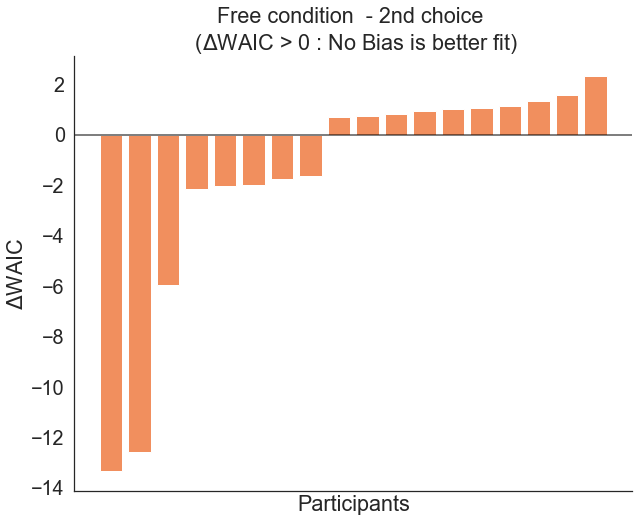

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

plt.bar(range(len(waic_exp2_2ndChoice_gaze_free)), diffsFree, color = '#f18f5e')
plt.xlabel('Participants')
plt.ylabel('$\Delta$WAIC')
plt.axhline(0, color='#000000', lw=2, alpha=0.5)
plt.xticks([],[])

plt.title('Free condition  - 2nd choice \n ($\Delta$WAIC > 0 : No Bias is better fit) ')
sns.despine()


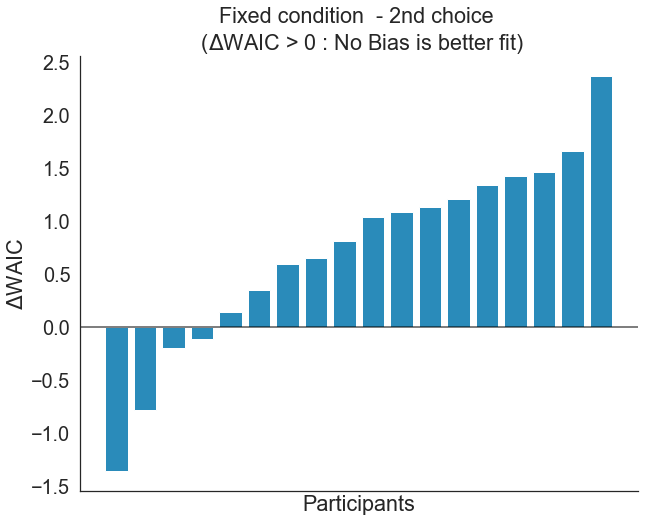

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

plt.bar(range(len(waic_exp2_2ndChoice_gaze_free)), diffsFixed, color = '#2a8bba')
plt.xlabel('Participants')
plt.ylabel('$\Delta$WAIC')
plt.axhline(0, color='#000000', lw=2, alpha=0.5)
plt.xticks([],[])

plt.title('Fixed condition  - 2nd choice \n ($\Delta$WAIC > 0 : No Bias is better fit)')
sns.despine()


-----------------

--------------------------------------


# 2. Comparison Free trials : no bins vs  binned gaze information

# Define the values of  WAIC for the models


In [36]:
waic_exp2_2ndChoice_gaze_free_OG = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Free.npy'))
waic_exp2_2ndChoice_gaze_free = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Free_Gaze3Bins.npy'))
waic_exp2_2ndChoice_gaze_fix = np.load(str('Results/Waic/glam_CP2020_indiv_GazeBias_exp2_2ndChoice_Fixed.npy'))

In [37]:
waic_exp2_2ndChoice_gaze_free

array([-567.54071763, -478.51890397, -513.29224737, -536.33346239,
       -566.02989757, -500.12277921, -594.44408287, -504.88000341,
       -465.10654285, -546.69642836, -451.97054199, -556.09075846,
       -496.03590339, -516.26555825, -489.35107616, -507.02105728,
       -564.53768044, -597.99914226])

In [38]:
Models_WAIC = [np.mean(waic_exp2_2ndChoice_gaze_free_OG),
               np.mean(waic_exp2_2ndChoice_gaze_free)]

Models_WAIC_part = [waic_exp2_2ndChoice_gaze_free_OG,
                    waic_exp2_2ndChoice_gaze_free]


Models_WAIC

[-524.5805525835517, -525.1242657692917]

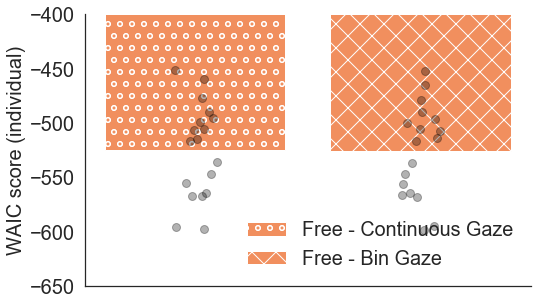

In [39]:
ysize = 20
ticksize = 20
nticks = 5

fig, ax = plt.subplots(1,1,figsize=(8,5))
sns.set(style='white', font_scale=1.8)

ax.set_facecolor('xkcd:white')


x = np.arange(len(Models_WAIC))

bars = plt.bar(x, Models_WAIC, color=['#f18f5e','#f18f5e'])
patterns = ('o', 'x')

#plt.xticks(x, ('', 'Frame-Value', 'Preference-Value'))
#plt.ylim(15000,18000)
plt.ylabel('WAIC score (individual)',fontsize = ysize )

st2_free_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'o', label='Free - Continuous Gaze')
st2_fixed_patch = mpatches.Patch(facecolor='#f18f5e',hatch=r'x', label='Free - Bin Gaze')

leg = plt.legend(handles=[st2_free_patch,st2_fixed_patch],loc = "lower right" )
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

    
# Turn off tick labels
#plt.xticks([0,1,2,3,4,5,6,7],['Cho1','Cho2','Cho1','Cho2','Cho2','Cho1','Cho2','Cho2'])
plt.axhline(0, color='black', lw=2, alpha=0.5)
plt.yticks(fontsize=ticksize)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
plt.xticks([],[])
plt.ylim([-650,-400])

sns.despine()

plt.show()

#fig.savefig(str('SavedFigures/CP2020_WAIC_ModelComparison_hier.png'), dpi = 200 )

In [40]:
print('Study 2/ 2nd Choice - Gaze Bias/ Free vs Fixed : ' + str(stats.ttest_rel(waic_exp2_2ndChoice_gaze_free_OG,waic_exp2_2ndChoice_gaze_free)))

Study 2/ 2nd Choice - Gaze Bias/ Free vs Fixed : Ttest_relResult(statistic=1.4616236938645586, pvalue=0.1620832563674423)


###  no significant differences between WAIC scores between bins and continous gaze model fits 

------------------

 # ---[END]----